# Análise SVM

Neste notebook, iremos treinar um algoritmo SVM (Support Vector Machine) com nossos diferentes conjuntos de dados e analisar os resultados.

Faremos uma comparação de acurácia entre a divisão de dados em treinamento e teste e uma validação cruzada de 2 dobras. 

Em seguida, analisaremos profundamente o desempenho desses modelos por meio de métricas de desempenho.

O SVM é algoritmo de aprendizado supervisionado muito utilizado em problemas de classificação e regressão. Uma técnica para classificação que busca encontrar um hiperplano que ue maximiza a "margem" entre as classes em um espaço de características. 

A abordagem do SVM é particularmente eficaz em casos onde as classes não são linearmente separáveis, utilizando o truque do kernel para transformar os dados em um espaço de maior dimensão.

Alguns tipos comuns de kernels são:

Linear: Utilizado quando os dados podem ser separados por uma linha reta (ou hiperplano plano).


RBF (Radial Basis Function): Uma transformação não linear comum que permite separar dados mais complexos em dimensões mais altas.


Polinomial: Usa uma transformação polinomial dos dados para separação.

Parâmetros Importantes



C: Controla a rigidez da margem. Um valor alto de C tenta classificar todos os pontos corretamente, o que pode causar overfitting. Um valor muito baixo pode causar underfitting, por dar margem muito grande para a classificação.




Gamma: No kernel RBF, o gamma define o quanto um único ponto afeta a classificação. Valores altos de gamma podem gerar modelos complexos, enquanto valores baixos podem subajustar.

# 

# 0. Libraries

In [1]:
# Importando bibliotecas necessárias
import numpy as np  # Para manipulação de arrays
import pandas as pd  # Para manipulação de dados em DataFrames
import seaborn as sns  # Para visualização de dados
import matplotlib.pyplot as plt  # Para criação de gráficos
from sklearn.svm import SVC  # Importando a classe SVC para SVM (Máquina de Vetores de Suporte)
from sklearn.model_selection import learning_curve  # Para gerar curvas de aprendizado
from sklearn.model_selection import GridSearchCV  # Para ajuste de hiperparâmetros usando Grid Search
from sklearn.model_selection import cross_val_score  # Para validação cruzada
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.metrics import accuracy_score  # Para calcular a acurácia
from sklearn.metrics import confusion_matrix  # Para criar a matriz de confusão
from sklearn.metrics import classification_report  # Para relatar métricas de classificação
from sklearn.metrics import roc_auc_score, roc_curve  # Para calcular a AUC e a curva ROC
from sklearn.decomposition import PCA  # Para análise de componentes principais (PCA) #não foi utilizado
from sklearn.feature_selection import SelectKBest, f_classif  # Para seleção de características
from joblib import parallel_backend  # Para paralelização de tarefas
from sklearn.preprocessing import StandardScaler

# 

# 1. Organized By Slices

## &emsp;&emsp;&emsp;1.1 Non Normalized Dataset

As duas melhores características selecionadas são: ['diameter', 'original_glcm_Imc1']
Primeiras linhas de X_selected:
[[ 5.07666229 -0.75773992]
 [ 5.07666229 -0.73333333]
 [10.40043062 -0.78228327]
 [10.40043062 -0.50085301]
 [10.40043062 -0.24360407]]

Primeiras linhas de y:
0   -1
1   -1
2   -1
3   -1
4   -1
Name: malignancy, dtype: int64
Acurácia do modelo SVM (kernel linear): 0.79


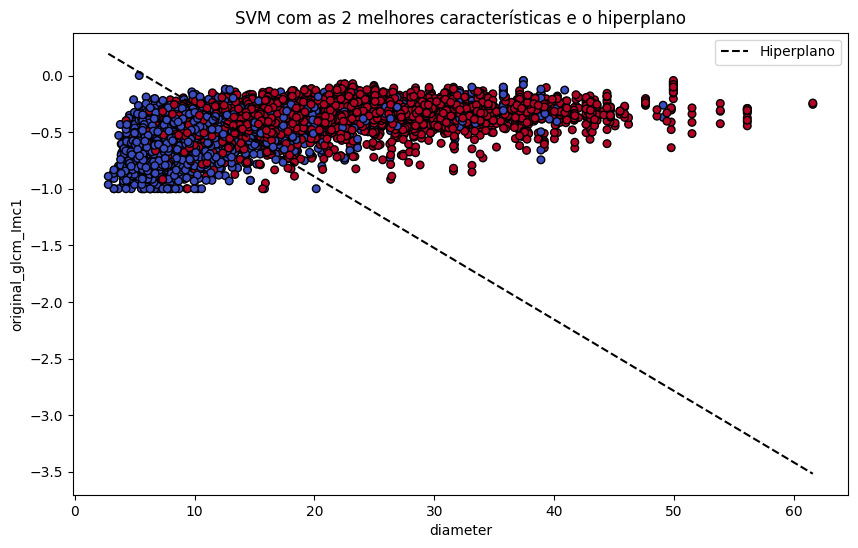

In [19]:
# Carregar o conjunto de dados
df_by_slices = pd.read_csv("final_by_slices.csv")

# Separar características e rótulo
X = df_by_slices.drop("malignancy", axis=1)
y = df_by_slices["malignancy"]

# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')


# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [4]:
# Suponha que você tenha um novo input
new_input = [[5, -0.7]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: -1
Probabilidades para cada classe: [[0.87993824 0.12006176]]


Como o SVM Funciona com Múltiplas Características
Espaço de Características de Alta Dimensão:

Com mais de duas características, os dados ocupam um espaço de alta dimensão. Por exemplo, se você tiver 5 características, os dados estarão em um espaço 5D.
O objetivo do SVM é encontrar um hiperplano que separe as classes nesse espaço de características.
Hiperplano:

Em um espaço 2D, um hiperplano é uma linha. Em 3D, é um plano. Em dimensões superiores, um hiperplano é definido por uma equação linear que pode ser mais difícil de visualizar, mas ainda é matematicamente válido.
O SVM tenta maximizar a margem, que é a distância entre o hiperplano e os pontos de dados mais próximos (vetores de suporte) de ambas as classes.

In [24]:
# Lendo o conjunto de dados a partir de um arquivo CSV
df_by_slices = pd.read_csv("final_by_slices.csv")

# Separando as características (features) do rótulo (target)
X = df_by_slices.drop("malignancy", axis=1)  # 'X' contém todas as colunas exceto 'malignancy'
y = df_by_slices["malignancy"]  # 'y' contém apenas a coluna 'malignancy'

# Seleção de características usando ANOVA F-value
# Aqui, escolhemos as 50 melhores características que têm maior relação com o rótulo
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)  # Aplica a seleção de características

# Convertendo X_selected de volta para um DataFrame para melhor manipulação
X_selected = pd.DataFrame(X_selected)
# Arredondando os valores para 10 casas decimais para melhor apresentação
X_selected = X_selected.round(10)

# Criando conjuntos de treinamento e teste
# Aqui, 30% dos dados serão usados para teste, e 70% para treinamento
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas após a seleção
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas usando os índices
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())  # Exibe a lista das características selecionadas

# Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y



Características selecionadas:
['subtlety', 'calcification', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_InverseVariance', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphas

In [25]:
# Definindo os parâmetros para o GridSearch
# Estamos testando diferentes valores de 'C', e usando 'scale' para 'gamma' e o kernel 'rbf'
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale'], 'kernel': ['rbf']}

# Criando o classificador SVM
# 'probability=True' é usado para permitir a previsão de probabilidades
svm = SVC(probability=True)

# Configurando o GridSearchCV
# O GridSearchCV irá testar combinações dos parâmetros definidos em 'param_grid'
# 'cv=2' significa que a validação cruzada será feita em 2 partes
# 'scoring='accuracy'' indica que estamos avaliando a precisão
# 'n_jobs=-1' utiliza todos os núcleos disponíveis para acelerar o processo
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Ajustando o modelo com os dados de treinamento
# O GridSearchCV irá realizar a validação cruzada e encontrar a melhor combinação de parâmetros
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo GridSearch
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Usando o melhor modelo encontrado para prever o conjunto de teste
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Calculando a acurácia da previsão no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia (Train-Test Split): {accuracy:.2f}')

# Relatório de classificação para análise detalhada do desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))




Melhores parâmetros encontrados:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Acurácia (Train-Test Split): 0.80
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.79      0.81      0.80      5153
           1       0.80      0.78      0.79      5047

    accuracy                           0.80     10200
   macro avg       0.80      0.80      0.80     10200
weighted avg       0.80      0.80      0.80     10200



In [26]:

# Calculando a acurácia para validação cruzada de 2 dobras (ou k = 2)
# O uso de parallel_backend permite que o processo utilize todos os núcleos disponíveis
with parallel_backend('threading', n_jobs=-1):  # Usando paralelismo para acelerar o processo
    cv_scores = cross_val_score(best_svm, X_selected, y, cv=2)  # Executando a validação cruzada

# Exibindo a média e o desvio padrão das acurácias obtidas na validação cruzada
print(f'Acurácia (2-Fold Cross Validation): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Acurácia (10-Fold Cross Validation): 0.79 ± 0.01


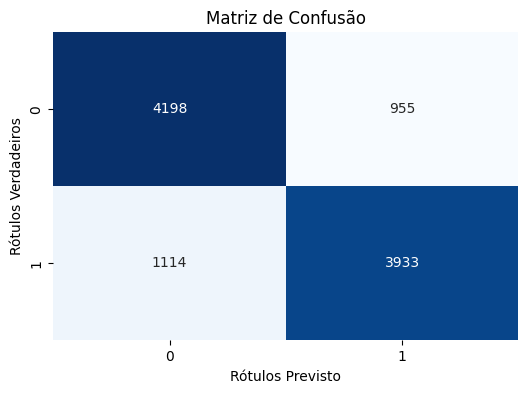

In [27]:
# Obtendo a matriz de confusão com base nos rótulos verdadeiros e previstos
cm = confusion_matrix(y_test, y_pred)

# Configurando a figura para o gráfico da matriz de confusão
plt.figure(figsize=(6, 4))  # Define o tamanho da figura

# Criando o gráfico da matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)  # 'annot=True' adiciona os valores na matriz
plt.xlabel('Rótulos Previsto')  # Label do eixo x
plt.ylabel('Rótulos Verdadeiros')  # Label do eixo y
plt.title('Matriz de Confusão')  # Título do gráfico
plt.show()  # Exibe o gráfico

#---------



AUC: 0.87


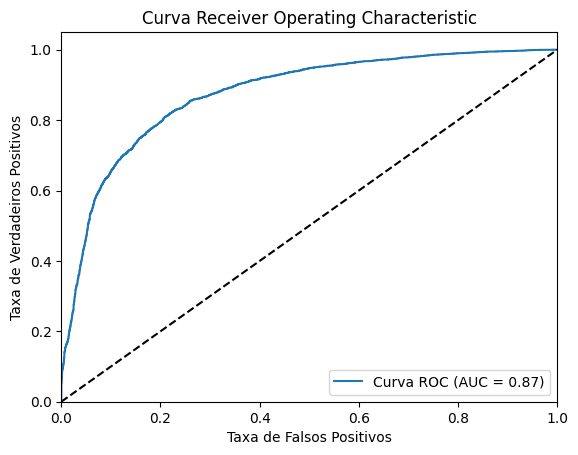

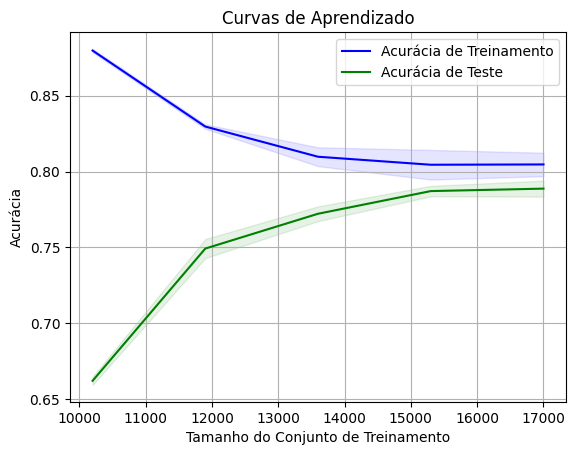

In [28]:
# Probabilidades para a classe positiva (classe 1)
y_proba = best_svm.predict_proba(X_test)[:, 1]  # Obtendo as probabilidades previstas para a classe 1

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)  # Calculando a AUC com as probabilidades e os rótulos verdadeiros
print(f'AUC: {roc_auc:.2f}')  # Exibindo a AUC

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # Calculando a taxa de falsos positivos e a taxa de verdadeiros positivos

# Plotando a curva ROC
plt.figure()  # Criando uma nova figura
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)  # Plotando a curva ROC
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal representando um classificador aleatório
plt.xlim([0.0, 1.0])  # Limites do eixo x
plt.ylim([0.0, 1.05])  # Limites do eixo y
plt.xlabel('Taxa de Falsos Positivos')  # Rótulo do eixo x
plt.ylabel('Taxa de Verdadeiros Positivos')  # Rótulo do eixo y
plt.title('Curva Receiver Operating Characteristic')  # Título do gráfico
plt.legend(loc='lower right')  # Local da legenda
plt.show()  # Exibe o gráfico

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usando todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        best_svm, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)  # Usando 10 tamanhos de conjunto de treinamento
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)  # Média das pontuações de treinamento
test_scores_mean = np.mean(test_scores, axis=1)  # Média das pontuações de teste
train_scores_std = np.std(train_scores, axis=1)  # Desvio padrão das pontuações de treinamento
test_scores_std = np.std(test_scores, axis=1)  # Desvio padrão das pontuações de teste

# Plotando as curvas de aprendizado
plt.figure()  # Criando uma nova figura
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')  # Plotando a acurácia de treinamento
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')  # Plotando a acurácia de teste

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)  # Área entre a curva de treinamento
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)  # Área entre a curva de teste

plt.title('Curvas de Aprendizado')  # Título do gráfico
plt.xlabel('Tamanho do Conjunto de Treinamento')  # Rótulo do eixo x
plt.ylabel('Acurácia')  # Rótulo do eixo y
plt.legend(loc='best')  # Local da legenda
plt.grid()  # Adiciona uma grade ao gráfico
plt.show()  # Exibe o gráfico


## 

## &emsp;&emsp;&emsp;1.2 Normalized Dataset

As duas melhores características selecionadas são: ['diameter', 'original_glcm_Imc1']
Primeiras linhas de X_selected:
[[0.03881183 0.24226008]
 [0.03881183 0.26666667]
 [0.12937426 0.21771673]
 [0.12937426 0.49914699]
 [0.12937426 0.75639593]]

Primeiras linhas de y:
0   -1
1   -1
2   -1
3   -1
4   -1
Name: malignancy, dtype: int64
Acurácia do modelo SVM (kernel linear): 0.79


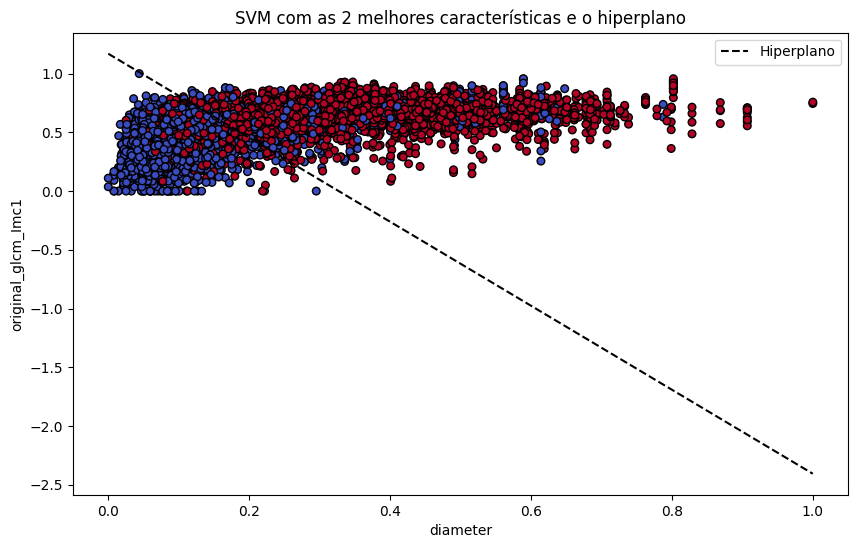

In [20]:
# Leitura do conjunto de dados
df_by_slices_normalized = pd.read_csv("final_by_slices_normalized.csv")

# Separação de recursos e rótulos
X = df_by_slices_normalized.drop("malignancy", axis=1)
y = df_by_slices_normalized["malignancy"]

# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')

# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [7]:
# Suponha que você tenha um novo input
new_input = [[0.03, 0.2]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: -1
Probabilidades para cada classe: [[0.91236146 0.08763854]]


In [ ]:
# Leitura do conjunto de dados
df_by_slices_normalized = pd.read_csv("final_by_slices_normalized.csv")

# Separação de recursos e rótulos
X = df_by_slices_normalized.drop("malignancy", axis=1)
y = df_by_slices_normalized["malignancy"]

# Seleção de características
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Convertendo X_selected para um DataFrame
X_selected = pd.DataFrame(X_selected)
X_selected = X_selected.round(10)


# Divisão do conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())
# Imprimindo as primeiras linhas de X_selected, X_reduced e y
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas de X_selected


print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y


Características selecionadas:
['subtlety', 'calcification', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_InverseVariance', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphas

In [ ]:
# Criação do classificador SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
# Ajuste do modelo SVM
svm_model.fit(X_train, y_train)

# Previsão com o modelo SVM
y_pred = svm_model.predict(X_test)

# Cálculo da acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (Train-Test Split): {accuracy_svm:.2f}')


# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo SVM (Train-Test Split): 0.85
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.86      0.84      0.85      5153
           1       0.84      0.86      0.85      5047

    accuracy                           0.85     10200
   macro avg       0.85      0.85      0.85     10200
weighted avg       0.85      0.85      0.85     10200



In [ ]:
# Cálculo da acurácia com validação cruzada para o modelo SVM usando Joblib
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    cv_scores_svm = cross_val_score(svm_model, X_selected, y, cv=)

print(f'Acurácia média com validação cruzada (10 dobras): {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Acurácia média com validação cruzada (10 dobras): 0.84 ± 0.00


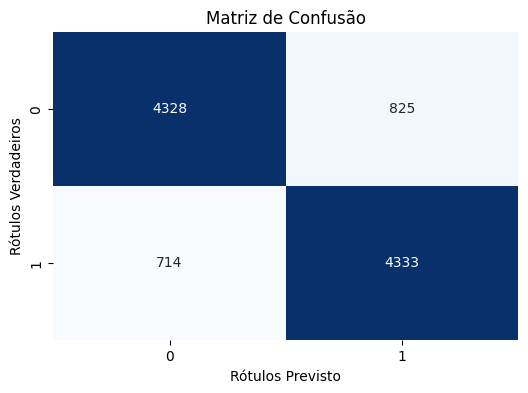

In [32]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Rótulos Previsto')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


#---------



AUC: 0.92


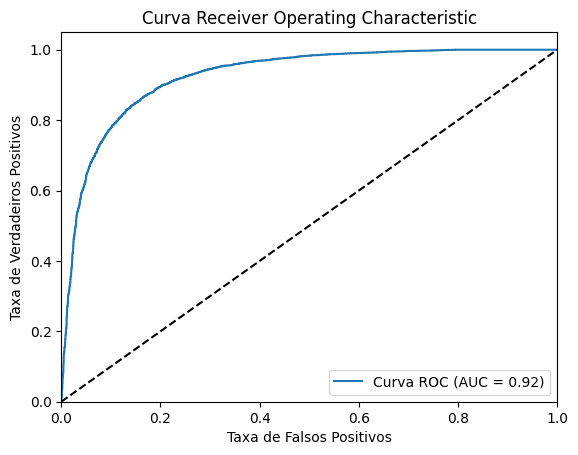

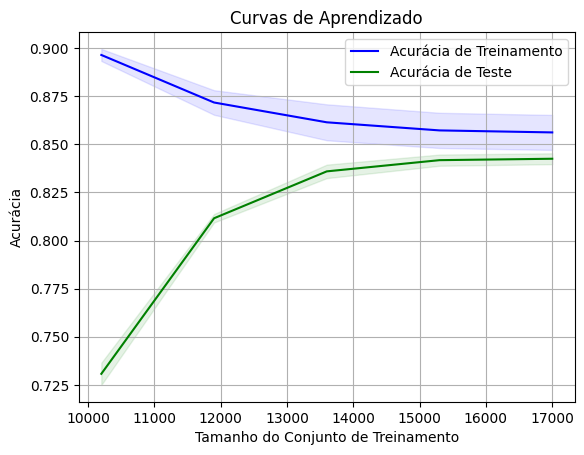

In [33]:
# Probabilidades para a classe positiva (classe 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.2f}')

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

## &emsp;&emsp;&emsp;1.3 Comparação
| Modelo SVM | Acurácia | AUC  | Precision (-1) | Recall (-1) | Precision (1) | Recall (1) |
|------------|----------|------|----------------|-------------|----------------|------------|
| Modelo 1   | 0.80     | 0.87 | 0.79           | 0.81        | 0.80           | 0.78       |
| Modelo 2   | 0.85     | 0.92 | 0.86           | 0.84        | 0.84           | 0.86       |

Precision e Recall: Os valores de precisão e recall para ambas as classes (-1 e 1) são bastante equilibrados, com o modelo apresentando um desempenho consistente.

há uma leve melhoria em relação ao dataset não normalizado, indicando que a normalização pode ter contribuído para um melhor ajuste do modelo.

A normalização pode ajudar a lidar com a variação nas escalas das features, permitindo que o SVM encontre um limite de decisão mais eficaz.

Ambos os modelos apresentam métricas de classificação (precision e recall) que são relativamente altas e bem equilibradas, o que indica que o modelo está generalizando bem para as classes positivas e negativas. 

Isso é crucial em aplicações como a detecção de câncer, onde tanto a sensibilidade quanto a especificidade são importantes.

A AUC é uma boa métrica para avaliar a capacidade do modelo de distinguir entre as classes. 

A melhoria significativa na AUC após a normalização é um sinal positivo de que o modelo está se tornando mais eficaz em suas previsões.

# 

# 2. Organized By Annotations

## &emsp;&emsp;&emsp;2.1 Non Normalized Dataset

As duas melhores características selecionadas são: ['original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter']
Primeiras linhas de X_selected:
[[21.8739664  23.74907687]
 [20.86799071 22.95876898]
 [23.42519601 25.12453556]
 [25.37581498 27.45376747]
 [21.9559338  23.99593211]]

Primeiras linhas de y:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: malignancy, dtype: float64
Acurácia do modelo SVM (kernel linear): 0.79


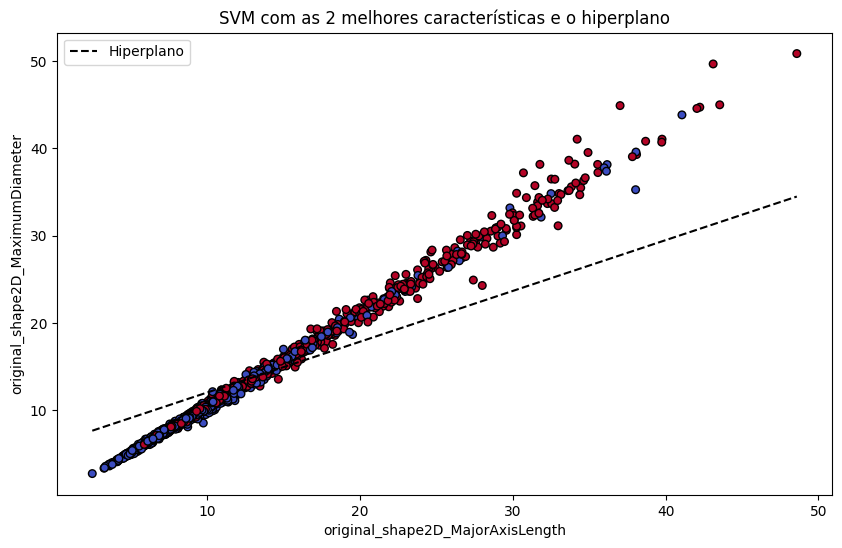

In [21]:
#reading the dataset
df_by_annotations = pd.read_csv("final_by_annotations.csv")

#separate the features from the label
X = df_by_annotations.drop("malignancy", axis=1)
y = df_by_annotations["malignancy"]

# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')

# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [11]:
# Suponha que você tenha um novo input
new_input = [[20, 22]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: 1.0
Probabilidades para cada classe: [[0.08312619 0.91687381]]


In [34]:
#reading the dataset
df_by_annotations = pd.read_csv("final_by_annotations.csv")

#separate the features from the label
X = df_by_annotations.drop("malignancy", axis=1)
y = df_by_annotations["malignancy"]
# Seleção de características
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Convertendo X_selected para um DataFrame
X_selected = pd.DataFrame(X_selected)
X_selected = X_selected.round(10)


# Divisão do conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())
# Imprimindo as primeiras linhas de X_selected, X_reduced e y
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas de X_selected


print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y

Características selecionadas:
['subtlety', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_glcm_Correlation', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphasis', 'origi

In [35]:
# Criação do classificador SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
# Ajuste do modelo SVM
svm_model.fit(X_train, y_train)

# Previsão com o modelo SVM
y_pred = svm_model.predict(X_test)

# Cálculo da acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (Train-Test Split): {accuracy_svm:.2f}')


# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo SVM (Train-Test Split): 0.80
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.80      0.90      0.85      1082
         1.0       0.79      0.62      0.69       626

    accuracy                           0.80      1708
   macro avg       0.80      0.76      0.77      1708
weighted avg       0.80      0.80      0.79      1708



In [36]:
# Cálculo da acurácia com validação cruzada para o modelo SVM usando Joblib
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    cv_scores_svm = cross_val_score(svm_model, X_selected, y, cv=2)

print(f'Acurácia média com validação cruzada (10 dobras): {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Acurácia média com validação cruzada (10 dobras): 0.80 ± 0.03


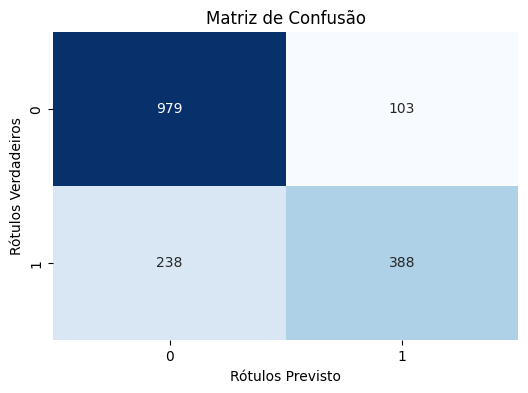

In [37]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Rótulos Previsto')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


#---------



AUC: 0.86


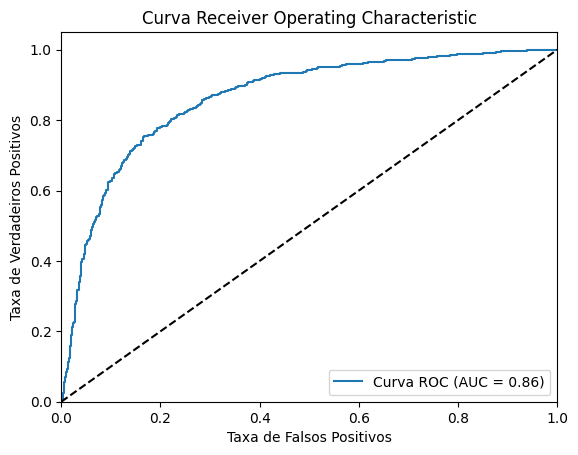

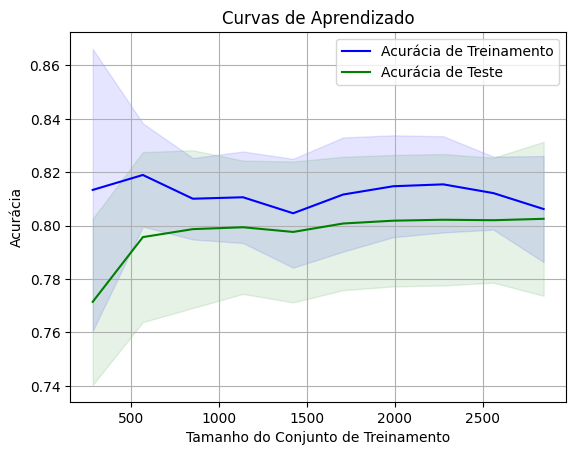

In [38]:
# Probabilidades para a classe positiva (classe 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.2f}')

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

## 

## &emsp;&emsp;&emsp;2.2 Normalized Dataset

As duas melhores características selecionadas são: ['original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter']
Primeiras linhas de X_selected:
[[0.20137209 0.29584464]
 [0.19117909 0.28497641]
 [0.21708986 0.3147598 ]
 [0.23685442 0.34679116]
 [0.20220262 0.29923937]]

Primeiras linhas de y:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: malignancy, dtype: float64
Acurácia do modelo SVM (kernel linear): 0.79


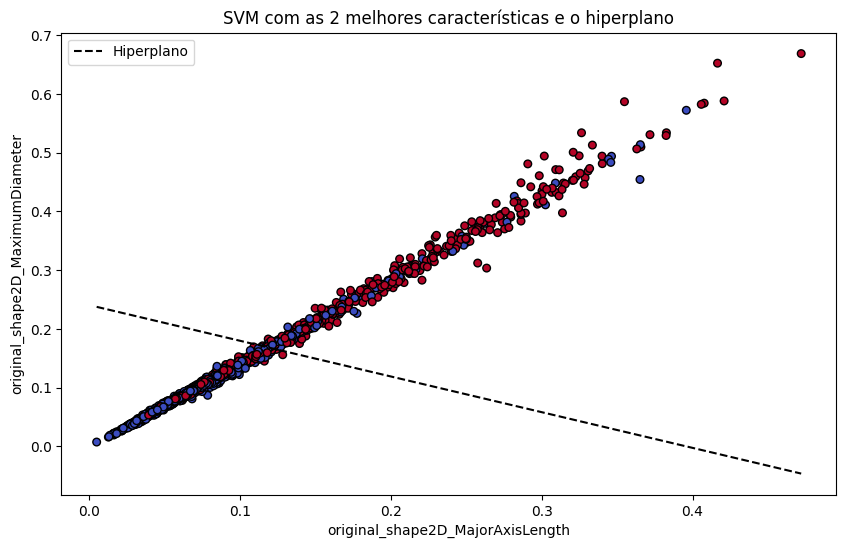

In [22]:
#reading the dataset
df_by_annotations_normalized = pd.read_csv("final_by_annotations_normalized.csv")

#separate the features from the label
X = df_by_annotations_normalized.drop("malignancy", axis=1)
y = df_by_annotations_normalized["malignancy"]

# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')

# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [13]:
# Suponha que você tenha um novo input
new_input = [[0.3, 0.2]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: 1.0
Probabilidades para cada classe: [[0.11491601 0.88508399]]


In [39]:
#reading the dataset
df_by_annotations_normalized = pd.read_csv("final_by_annotations_normalized.csv")

#separate the features from the label
X = df_by_annotations_normalized.drop("malignancy", axis=1)
y = df_by_annotations_normalized["malignancy"]
# Seleção de características
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Convertendo X_selected para um DataFrame
X_selected = pd.DataFrame(X_selected)
X_selected = X_selected.round(10)


# Divisão do conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())
# Imprimindo as primeiras linhas de X_selected, X_reduced e y
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas de X_selected


print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y

Características selecionadas:
['subtlety', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_glcm_Correlation', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphasis', 'origi

In [40]:
# Criação do classificador SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
# Ajuste do modelo SVM
svm_model.fit(X_train, y_train)

# Previsão com o modelo SVM
y_pred = svm_model.predict(X_test)

# Cálculo da acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (Train-Test Split): {accuracy_svm:.2f}')


# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo SVM (Train-Test Split): 0.84
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.85      0.90      0.88      1082
         1.0       0.81      0.73      0.77       626

    accuracy                           0.84      1708
   macro avg       0.83      0.81      0.82      1708
weighted avg       0.84      0.84      0.84      1708



In [41]:
# Cálculo da acurácia com validação cruzada para o modelo SVM usando Joblib
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    cv_scores_svm = cross_val_score(svm_model, X_selected, y, cv=2)

print(f'Acurácia média com validação cruzada (10 dobras): {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Acurácia média com validação cruzada (10 dobras): 0.84 ± 0.02


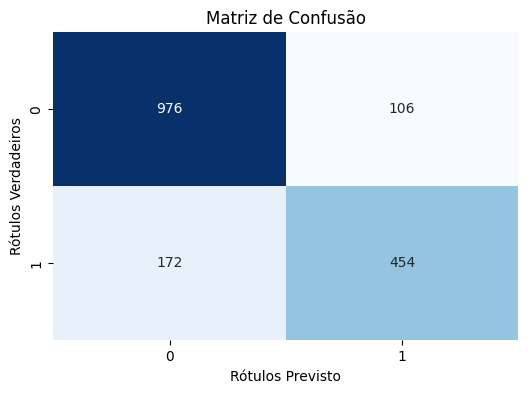

In [42]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Rótulos Previsto')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


#---------



AUC: 0.90


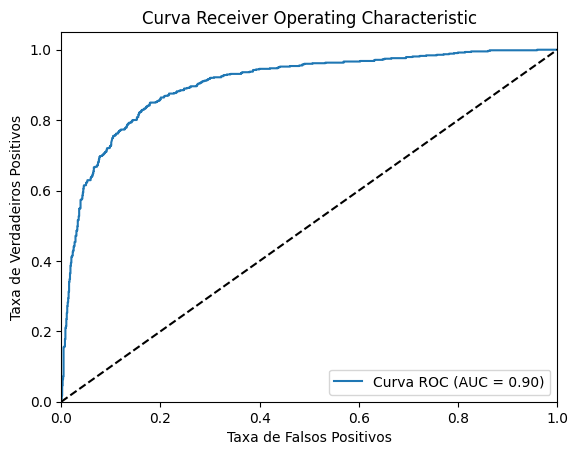

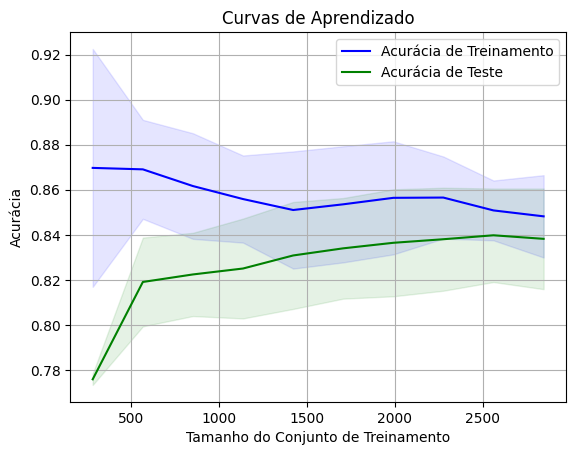

In [43]:
# Probabilidades para a classe positiva (classe 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.2f}')

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

## &emsp;&emsp;&emsp;2.3 Comparação
| Modelo SVM | Acurácia | AUC  | Precision (-1) | Recall (-1) | Precision (1) | Recall (1) |
|------------|----------|------|----------------|-------------|----------------|------------|
| Modelo 1   | 0.80     | 0.86 | 0.80           | 0.90        | 0.79           | 0.62       |
| Modelo 2   | 0.84     | 0.90 | 0.85           | 0.90        | 0.81           | 0.73       |


A precisão e o recall da classe -1.0 são bons, mas o recall da classe 1.0 é relativamente baixo, indicando que o modelo pode estar tendo dificuldades em identificar corretamente os casos positivos (classe 1.0).

A normalização melhorou a acurácia (de 0.80 para 0.84) e a AUC (de 0.86 para 0.90). As métricas de classificação para a classe -1.0 permaneceram sólidas, enquanto houve uma leve melhoria na precisão e recall da classe 1.0.

Assim como nas análises anteriores, a normalização dos dados parece ter um efeito positivo no desempenho do modelo. 

O aumento na acurácia e AUC sugere que a normalização ajuda o modelo a se adaptar melhor aos dados, resultando em melhores previsões.

Embora o recall da classe 1.0 tenha melhorado após a normalização, ainda há uma diferença em relação à classe -1.0.

# 

# 3. Organized By Nodules

## &emsp;&emsp;&emsp;3.1 Non Normalized Dataset

As duas melhores características selecionadas são: ['original_shape2D_MaximumDiameter', 'original_shape2D_MinorAxisLength']
Primeiras linhas de X_selected:
[[28.85886047 18.66463848]
 [23.4108661  16.28946924]
 [ 4.9650533   4.1428692 ]
 [27.63043444 20.89673766]
 [10.90322128  7.21119215]]

Primeiras linhas de y:
0    1
1    1
2   -1
3    1
4    1
Name: malignancy, dtype: int64


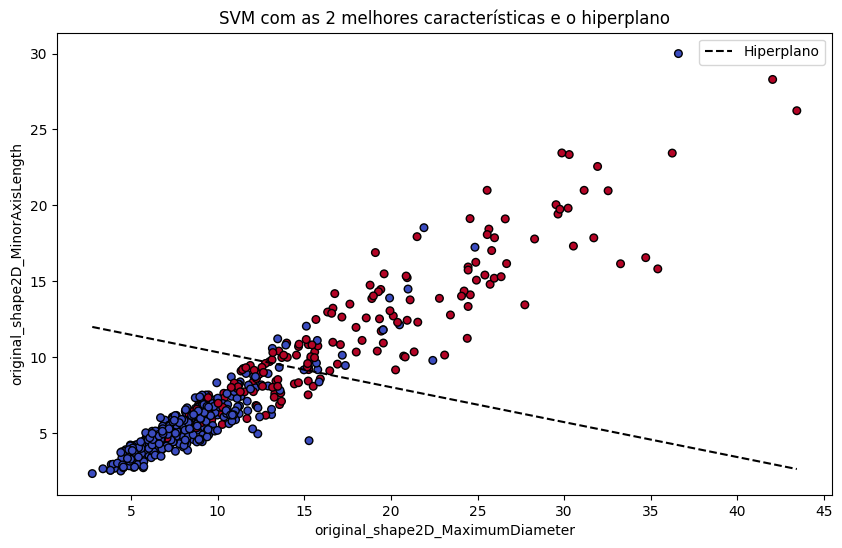

In [ ]:
#reading the dataset
df_by_nodules = pd.read_csv("final_by_nodules.csv")

#separate the features from the label
X = df_by_nodules.drop("malignancy", axis=1)
y = df_by_nodules["malignancy"]
# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')

# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [15]:
# Suponha que você tenha um novo input
new_input = [[0.03, 0.2]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: -1
Probabilidades para cada classe: [[0.98285465 0.01714535]]


In [44]:
#reading the dataset
df_by_nodules = pd.read_csv("final_by_nodules.csv")

#separate the features from the label
X = df_by_nodules.drop("malignancy", axis=1)
y = df_by_nodules["malignancy"]

# Seleção de características
selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Convertendo X_selected para um DataFrame
X_selected = pd.DataFrame(X_selected)
X_selected = X_selected.round(10)


# Divisão do conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())
# Imprimindo as primeiras linhas de X_selected, X_reduced e y
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas de X_selected


print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y

Características selecionadas:
['subtlety', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_Kurtosis', 'original_glcm_Correlation', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphas

In [45]:
# Criação do classificador SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
# Ajuste do modelo SVM
svm_model.fit(X_train, y_train)

# Previsão com o modelo SVM
y_pred = svm_model.predict(X_test)

# Cálculo da acurácia do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (Train-Test Split): {accuracy_svm:.2f}')


# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo SVM (Train-Test Split): 0.84
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.83      0.96      0.89       424
           1       0.85      0.57      0.68       188

    accuracy                           0.84       612
   macro avg       0.84      0.76      0.79       612
weighted avg       0.84      0.84      0.83       612



In [46]:
# Cálculo da acurácia com validação cruzada para o modelo SVM usando Joblib
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    cv_scores_svm = cross_val_score(svm_model, X_selected, y, cv=2)

print(f'Acurácia média com validação cruzada (10 dobras): {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Acurácia média com validação cruzada (10 dobras): 0.84 ± 0.03


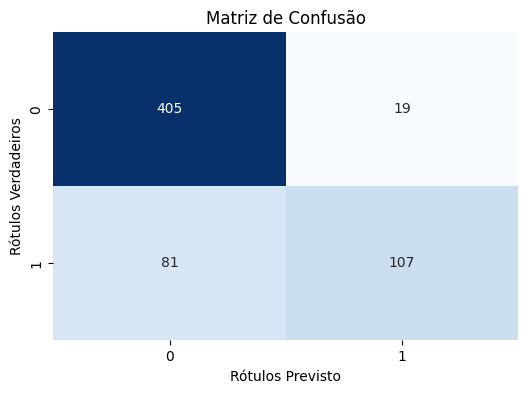

In [47]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Rótulos Previsto')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


#---------



AUC: 0.90


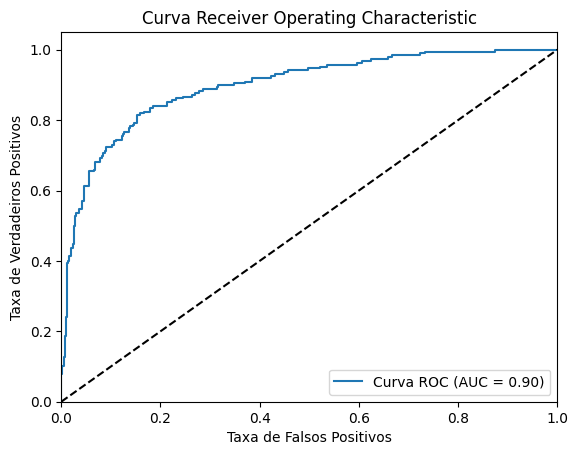

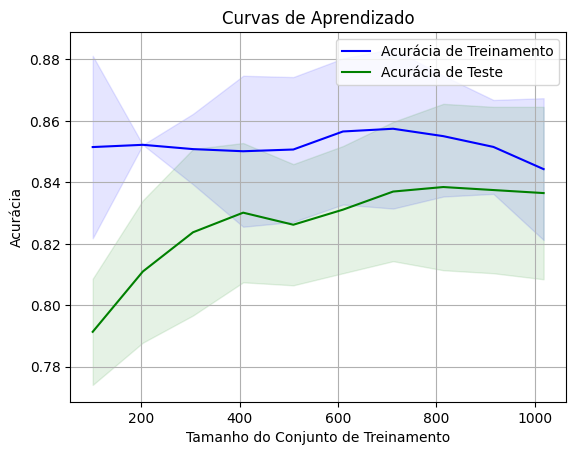

In [48]:
# Probabilidades para a classe positiva (classe 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.2f}')

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

## 

## &emsp;&emsp;&emsp;3.2 Normalized Dataset

As duas melhores características selecionadas são: ['original_shape2D_MaximumDiameter', 'original_shape2D_MinorAxisLength']
Primeiras linhas de X_selected:
[[0.36611385 0.39726544]
 [0.2911936  0.34671141]
 [0.03752872 0.08817844]
 [0.34922066 0.4447743 ]
 [0.11918978 0.15348582]]

Primeiras linhas de y:
0    1
1    1
2   -1
3    1
4    1
Name: malignancy, dtype: int64


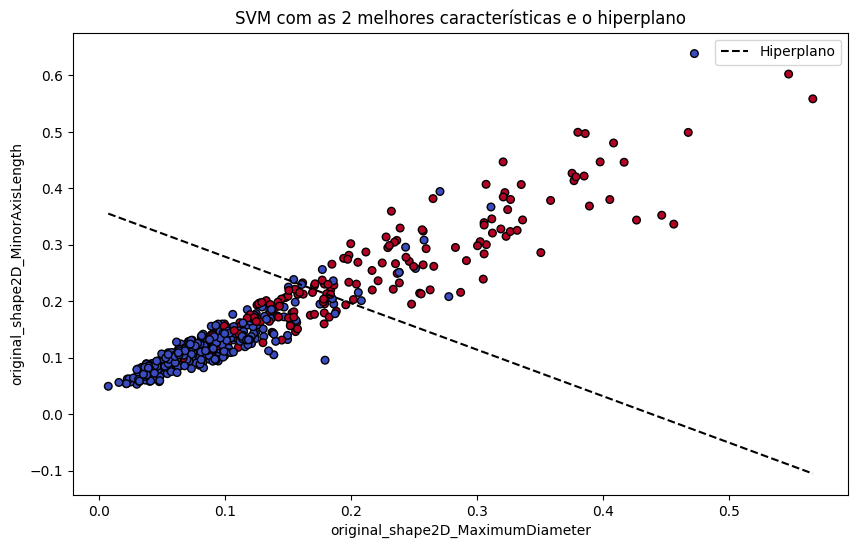

In [ ]:
#reading the dataset
df_by_nodules_normalized = pd.read_csv("final_by_nodules_normalized.csv")

#separate the features from the label
X = df_by_nodules_normalized.drop("malignancy", axis=1)
y = df_by_nodules_normalized["malignancy"]

# Selecionar as 2 melhores características
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Obter os nomes das duas melhores características selecionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("As duas melhores características selecionadas são:", selected_features.tolist())
#Imprimindo as primeiras linhas de X_selected
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas do DataFrame X_selected

# Imprimindo as primeiras linhas de y para verificar os rótulos
print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y
# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o SVM com kernel RBF
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)


# Previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (kernel linear): {accuracy:.2f}')
# Plotar a região de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')

# Obter os coeficientes e intercepto do SVM treinado
w = svm_model.coef_[0]  # Coeficientes do hiperplano
b = svm_model.intercept_[0]  # Intercepto do hiperplano

# Criar uma linha para o hiperplano
x_hyperplane = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_hyperplane = -(w[0] / w[1]) * x_hyperplane - b / w[1]

# Plotar o hiperplano
plt.plot(x_hyperplane, y_hyperplane, 'k--', label="Hiperplano")

# Configurações de legenda e eixos
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("SVM com as 2 melhores características e o hiperplano")
plt.legend()
plt.show()

In [18]:
# Suponha que você tenha um novo input
new_input = [[0.3, 0.2]]  # Preencha com o número correto de características
# Fazendo a previsão
prediction = svm_model.predict(new_input)

# Exibindo a previsão
print(f'A classe prevista para o novo input é: {prediction[0]}')
# Para obter as probabilidades
probabilities = svm_model.predict_proba(new_input)

# Exibindo as probabilidades
print(f'Probabilidades para cada classe: {probabilities}')

A classe prevista para o novo input é: 1
Probabilidades para cada classe: [[0.21016475 0.78983525]]


In [49]:
#reading the dataset
df_by_nodules_normalized = pd.read_csv("final_by_nodules_normalized.csv")

#separate the features from the label
X = df_by_nodules_normalized.drop("malignancy", axis=1)
y = df_by_nodules_normalized["malignancy"]

selector = SelectKBest(score_func=f_classif, k=50)
X_selected = selector.fit_transform(X, y)

# Convertendo X_selected para um DataFrame
X_selected = pd.DataFrame(X_selected)
X_selected = X_selected.round(10)


# Divisão do conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Obtendo os índices das características selecionadas
selected_indices = selector.get_support(indices=True)
# Obtendo os nomes das características selecionadas
selected_features = X.columns[selected_indices]

# Imprimindo os nomes das características selecionadas
print("Características selecionadas:")
print(selected_features.tolist())
# Imprimindo as primeiras linhas de X_selected, X_reduced e y
print("Primeiras linhas de X_selected:")
print(X_selected[:5])  # Imprime as primeiras 5 linhas de X_selected


print("\nPrimeiras linhas de y:")
print(y.head())  # Imprime as primeiras 5 linhas de y

Características selecionadas:
['subtlety', 'lobulation', 'spiculation', 'diameter', 'surfaceArea', 'volume', 'diagnostics_Mask-original_VoxelNum', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_Kurtosis', 'original_glcm_Correlation', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_SumEntropy', 'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_LargeDependenceEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphas

In [50]:
# Criação do classificador SVM
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
# Ajuste do modelo SVM
svm_model.fit(X_train, y_train)

# Previsão com o modelo SVM
y_pred = svm_model.predict(X_test)

# Cálculo da acurácia do modelo SVM
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM (Train-Test Split): {accuracy_svm:.2f}')


# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo SVM (Train-Test Split): 0.84
Relatório de Classificação:
              precision    recall  f1-score   support

          -1       0.87      0.95      0.91       424
           1       0.85      0.69      0.76       188

    accuracy                           0.87       612
   macro avg       0.86      0.82      0.84       612
weighted avg       0.87      0.87      0.86       612



In [51]:
# Cálculo da acurácia com validação cruzada para o modelo SVM usando Joblib
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    cv_scores_svm = cross_val_score(svm_model, X_selected, y, cv=2)

print(f'Acurácia média com validação cruzada (10 dobras): {cv_scores_svm.mean():.2f} ± {cv_scores_svm.std():.2f}')


Acurácia média com validação cruzada (10 dobras): 0.86 ± 0.02


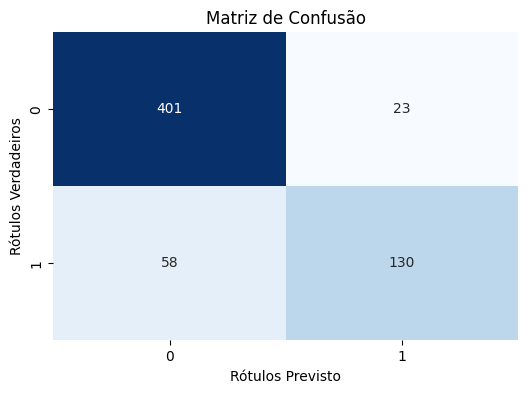

In [52]:
# Obtendo a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Rótulos Previsto')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


#---------



AUC: 0.92


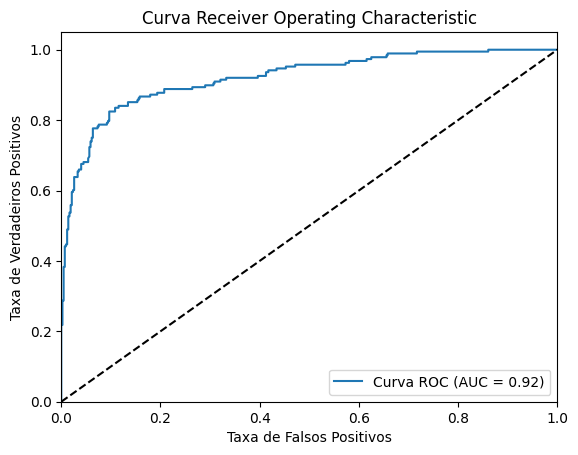

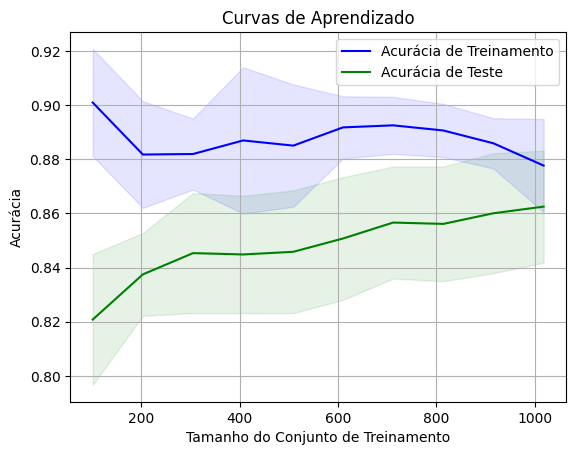

In [53]:
# Probabilidades para a classe positiva (classe 1)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Obtendo AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC: {roc_auc:.2f}')

# Computando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Obtendo as curvas de aprendizado
with parallel_backend('threading', n_jobs=-1):  # Usa todos os núcleos disponíveis
    train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_selected, y, cv=2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

# Calculando a média e desvio padrão das pontuações
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Acurácia de Treinamento', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Acurácia de Teste', color='green')

# Preenchendo a área entre as curvas
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.1)

plt.title('Curvas de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.grid()
plt.show()

## &emsp;&emsp;&emsp;3.3 Comparação
| Modelo SVM | Acurácia | AUC  | Precision (-1) | Recall (-1) | Precision (1) | Recall (1) |
|------------|----------|------|----------------|-------------|----------------|------------|
| Modelo 1   | 0.84     | 0.90 | 0.83           | 0.96        | 0.85           | 0.57       |
| Modelo 2   | 0.92     | 0.90 | 0.87           | 0.95        | 0.85           | 0.69       |


 O modelo apresenta uma boa acurácia geral, mas o recall da classe 1 (com nódulo) é bastante baixo. 
 
 Isso indica que, embora a precisão na previsão de nódulos seja relativamente alta, muitos casos com nódulos não estão sendo detectados, resultando em um alto número de falsos negativos.

A normalização não alterou a acurácia, mas a AUC aumentou de 0.90 para 0.92, sugerindo uma melhoria na capacidade do modelo de discriminar entre as classes. 

O recall da classe 1 melhorou em relação ao conjunto não normalizado, mas ainda está abaixo do ideal, indicando que o modelo ainda pode estar perdendo alguns casos de nódulos, o que pode ser crítico em um contexto clínico.

# 4. Conclusao 

Analisando os seis resultados apresentados e considerando o impacto da normalização, podemos tirar algumas conclusões importantes sobre o desempenho do modelo SVM em relação aos conjuntos de dados. 



1. Desempenho Sólido:


O modelo SVM com esses resultados demonstra um bom desempenho na classificação, quase sempre com uma acurácia mais de 85%.



2. Melhoria Consistente com a Normalização:


    Em todos os conjuntos de dados (Organized by Slices, Annotations e Nodules), a normalização levou a uma melhoria na Acurácia e no AUC. 

    Isso sugere que a normalização ajuda a criar um modelo mais robusto e eficaz na discriminação entre as classes.

    A normalização geralmente resultou em um aumento na capacidade do modelo de detectar a classe positiva (nódulos), refletido no aumento do recall para a classe 1 em vários casos.


    

2. Acurácia e AUC:



    A Acurácia do modelo variou entre 0.80 e 0.87, enquanto a AUC variou de 0.86 a 0.92. Os resultados indicam que, embora a Acurácia seja uma métrica importante, a AUC pode fornecer uma visão mais clara da capacidade discriminatória do modelo, especialmente em conjuntos desbalanceados.

    A AUC mais alta geralmente foi observada em configurações normalizadas, indicando que o modelo estava melhor em separar as classes.


Os resultados em geral até não foi má para detetar a doença, com um accuracy mais alto que esperava, embora não esteja a 100% certo.